In [3]:
!sudo apt-get update
!sudo apt-get install -y python3-dev python3-pip build-essential python3-numpy swig


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [47.6 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [632 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,265 kB]
Hit:13 https://ppa.lau

In [4]:
!pip install gymnasium[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.1 MB/s eta 0:00:00
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2349110 sha256=73b70ab35254bcc542a2e297d91b352398e629cd40489cf4c9b7238eea35a4d2
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 10.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.1 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=5445d1be336cdff5be021a540ae1236f8fa174517a4d4706a41f508bc6185708
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes


Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 97.2     |
|    ep_rew_mean     | -167     |
| time/              |          |
|    fps             | 1002     |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 93.2        |
|    ep_rew_mean          | -164        |
| time/                   |             |
|    fps                  | 769         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009242356 |
|    clip_fraction        | 0.033       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | -0.000403   |
|    learning

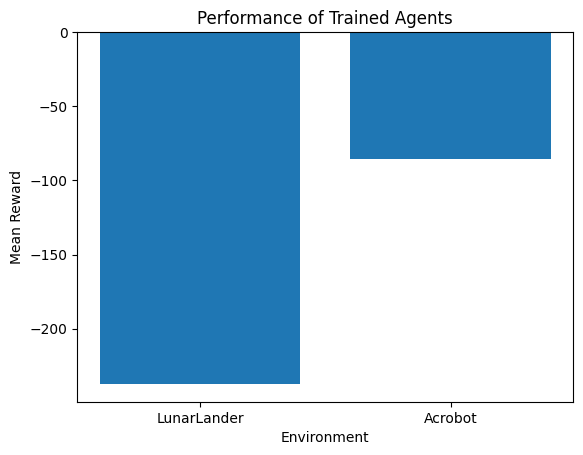

In [5]:
!pip install gym stable-baselines3[extra]

#importing necessary libraries

import gym
from stable_baselines3 import PPO, A2C
from stable_baselines3.common.env_util import make_vec_env
import matplotlib.pyplot as plt
from stable_baselines3.common.evaluation import evaluate_policy

# Creating environments for LunarLander and Acrobot
lunarlander_env = make_vec_env('LunarLander-v2', n_envs=1)
acrobot_env = make_vec_env('Acrobot-v1', n_envs=1)

# Instantiating and training the PPO model for LunarLander
lunarlander_model = PPO("MlpPolicy", lunarlander_env, verbose=1)
lunarlander_model.learn(total_timesteps=10000)

# Training the A2C model for Acrobot
acrobot_model = A2C("MlpPolicy", acrobot_env, verbose=1)
acrobot_model.learn(total_timesteps=10000)

# Evaluating the LunarLander agent
lunarlander_mean_reward, _ = evaluate_policy(lunarlander_model, lunarlander_env, n_eval_episodes=10)

# Evaluating the Acrobot agent
acrobot_mean_reward, _ = evaluate_policy(acrobot_model, acrobot_env, n_eval_episodes=10)

# Plotting the results of Environments, Rewards and Comparison of the environments
environments = ['LunarLander', 'Acrobot']
rewards = [lunarlander_mean_reward, acrobot_mean_reward]

plt.bar(environments, rewards)
plt.xlabel('Environment')
plt.ylabel('Mean Reward')
plt.title('Performance of Trained Agents')
plt.show()


In [6]:
pip install stable-baselines3 gym[atari]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.1 MB/s eta 0:00:00
  Attempting uninstall: ale-py
    Found existing installation: ale-py 0.8.1
    Uninstalling ale-py-0.8.1:
      Successfully uninstalled ale-py-0.8.1


In [7]:
#importing necessary libraries
import gymnasium as gym
from stable_baselines3 import PPO

# Defining the Atari environment name for Space Invaders
env_id = 'SpaceInvadersNoFrameskip-v4'

# Creating the Atari environment
env = gym.make(env_id)

# Defining the PPO model
model = PPO("CnnPolicy", env, verbose=1)

# Training the model
total_timesteps = 10000
model.learn(total_timesteps=total_timesteps)

# Evaluating the trained model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.99e+03 |
|    ep_rew_mean     | 70       |
| time/              |          |
|    fps             | 116      |
|    iterations      | 1        |
|    time_elapsed    | 17       |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1.99e+03   |
|    ep_rew_mean          | 70         |
| time/                   |            |
|    fps                  | 19         |
|    iterations           | 2          |
|    time_elapsed         | 208        |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.00843427 |
|    clip_fraction        | 0.0469     |
|    clip_range           | 0.2  

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward: 730.00 +/- 0.00


In [ ]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import EvalCallback
import matplotlib.pyplot as plt

# Defining the Atari environment name for Space Invaders
env_id = 'SpaceInvadersNoFrameskip-v4'
# Creating the Atari environment and wrap it with a Monitor
env = gym.make(env_id)
env = Monitor(env)

# Defining the PPO model
model = PPO("CnnPolicy", env, verbose=1)

# Training the model with multiple sets of total_timesteps
total_timesteps_list = [5000, 10000, 20000]
for idx, total_timesteps in enumerate(total_timesteps_list):
    print(f"Training {idx + 1}/{len(total_timesteps_list)}")

    # Setting up evaluation callback for each training run
    eval_env = gym.make(env_id)
    eval_callback = EvalCallback(eval_env, best_model_save_path=f'./logs/{idx}/',
                                 log_path=f'./logs/{idx}/', eval_freq=500,
                                 deterministic=True, render=False)

    # Training the model
    model.learn(total_timesteps=total_timesteps, callback=eval_callback)

# Visualizing training progress using Tensorboard logs for each run
for idx, _ in enumerate(total_timesteps_list):
    !tensorboard --logdir ./logs/{idx}/


Using cpu device
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Training 1/3


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/callbacks.py:414: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.vec_transpose.VecTransposeImage object at 0x79336c86bc70> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7934a1273d00>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


Eval num_timesteps=500, episode_reward=55.00 +/- 0.00
Episode length: 2723.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 2.72e+03 |
|    mean_reward     | 55       |
| time/              |          |
|    total_timesteps | 500      |
---------------------------------
New best mean reward!
Eval num_timesteps=1000, episode_reward=55.00 +/- 0.00
Episode length: 2723.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 2.72e+03 |
|    mean_reward     | 55       |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
Eval num_timesteps=1500, episode_reward=55.00 +/- 0.00
Episode length: 2723.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 2.72e+03 |
|    mean_reward     | 55       |
| time/              |          |
|    total_timesteps | 1500     |
---------------------------------
E

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/callbacks.py:414: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.vec_transpose.VecTransposeImage object at 0x79336c86bc70> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x79336beeccd0>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


Eval num_timesteps=500, episode_reward=50.00 +/- 0.00
Episode length: 1015.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.02e+03 |
|    mean_reward     | 50       |
| time/              |          |
|    total_timesteps | 500      |
---------------------------------
New best mean reward!
Eval num_timesteps=1000, episode_reward=50.00 +/- 0.00
Episode length: 1015.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.02e+03 |
|    mean_reward     | 50       |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
Eval num_timesteps=1500, episode_reward=50.00 +/- 0.00
Episode length: 1015.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1.02e+03 |
|    mean_reward     | 50       |
| time/              |          |
|    total_timesteps | 1500     |
---------------------------------
E

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/callbacks.py:414: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.vec_transpose.VecTransposeImage object at 0x79336c86bc70> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x79336beec280>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


Eval num_timesteps=500, episode_reward=220.00 +/- 0.00
Episode length: 3715.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 3.72e+03 |
|    mean_reward     | 220      |
| time/              |          |
|    total_timesteps | 500      |
---------------------------------
New best mean reward!
Eval num_timesteps=1000, episode_reward=220.00 +/- 0.00
Episode length: 3715.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 3.72e+03 |
|    mean_reward     | 220      |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
Eval num_timesteps=1500, episode_reward=220.00 +/- 0.00
Episode length: 3715.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 3.72e+03 |
|    mean_reward     | 220      |
| time/              |          |
|    total_timesteps | 1500     |
--------------------------------